In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.phase_decoder_support import *
from sklearn import metrics
import scipy
from scipy import integrate
from matplotlib import colors
from src.phase_decoder_support import *
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [2]:
teq0210 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/teq/0210')
teq0210.process()

read from t=0s to t=356.55s
read from t=0s to t=306.78s


(array([[  0.,  40.,   0., ...,   0.,  20.,  20.],
        [  0.,  60.,  20., ...,   0.,   0.,   0.],
        [  0.,  40.,  20., ...,   0.,   0.,   0.],
        ...,
        [ 60., 120.,  40., ...,  40.,  40.,  20.],
        [ 60.,  40.,   0., ...,  60.,  80.,  40.],
        [  0.,  80.,   0., ...,   0.,  20.,  80.]]),
 array([[ 70.64608109,  97.57468596, 126.03323152, ...,  72.37870212,
          81.30207218, 142.28147997],
        [118.5089405 ,  86.74379613, 116.71256432, ...,  66.460107  ,
          80.5819863 , 149.05987918],
        [ 99.14094375,  75.07944215, 110.50109249, ...,  76.13566963,
          71.49617182, 121.33329213],
        ...,
        [ 78.05304296, 113.44740457, 131.55938192, ...,  75.32258382,
          70.92851616, 131.01520662],
        [ 94.03615309, 105.42869007, 128.71117284, ...,  81.46972809,
          72.96090627, 130.02939816],
        [118.04666246,  82.26442872, 123.14782302, ...,  90.15571071,
          69.69082759, 119.75288105]]),
 array([0., 0., 

In [22]:
pearR, h_sin, h_cos, predicted_arctans, test_arctans, test_rates, swing_mean = teq0210.phase_train(upper_limit = 0.88, lower_limit = 0.13)

0.04153754507916263 0.04
0.06334500724891279 0.06
0.07064606725863365 0.07
0.0957594151327037 0.1
-0.08339066260591865 -0.08
-0.16990149262255239 -0.17
-0.08954634605949585 -0.09
-0.15810895301952987 -0.16
-0.3131953026267076 -0.31
-0.18615583689102744 -0.18
-0.021346150160051147 -0.02
0.039065797148358006 0.04
0.015768773140037884 0.02
0.01762028317299702 0.02
-0.08886762399830639 -0.09
-0.18518771227751385 -0.18
-0.08368513575578507 -0.08
-0.13664755976093979 -0.13
-0.24130179067941926 -0.24
-0.15576560828879926 -0.16


In [18]:
print(pearR)

-0.07846786432826205


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
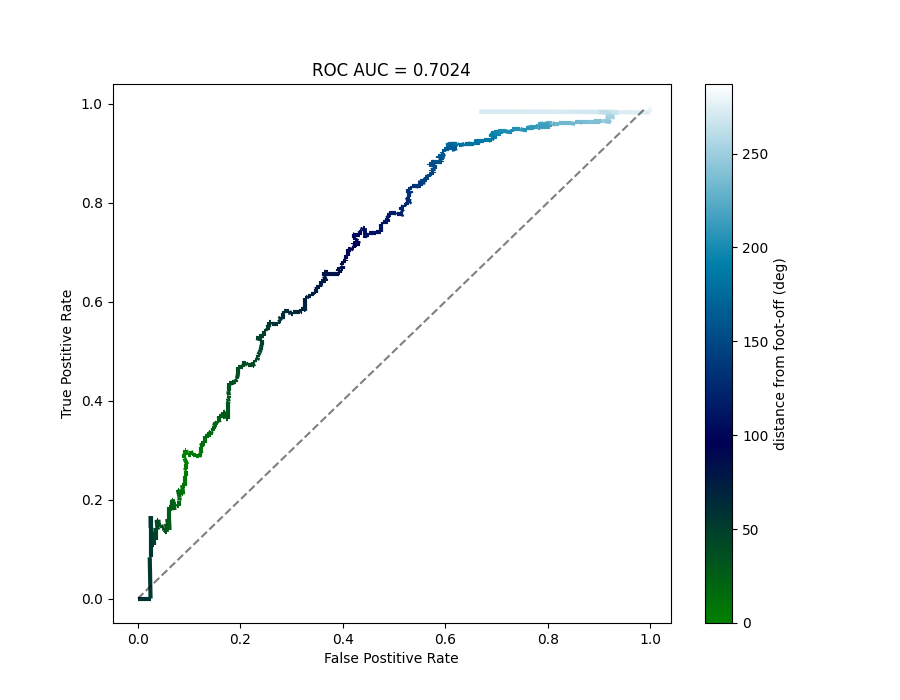

In [19]:
tpr,fpr,heat, max_heat = fascilli_roc(test_arctans, predicted_arctans, swing_mean)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
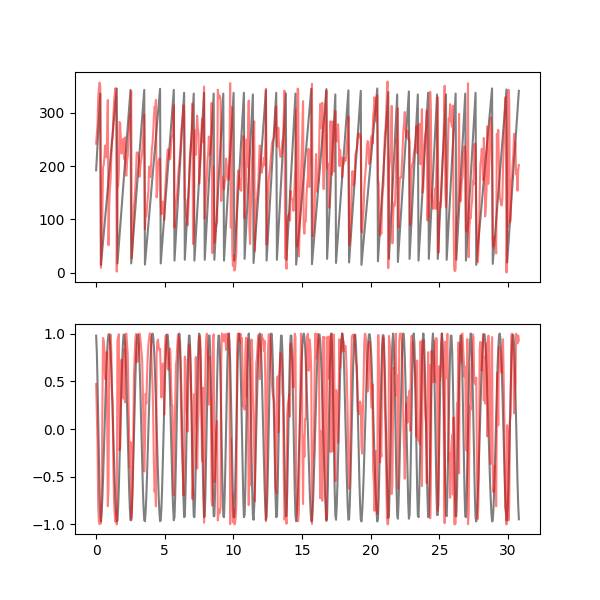

In [20]:
ts = np.linspace(0, (test_arctans.shape[0]*50)/1000,test_arctans.shape[0])
fig, ax = plt.subplots(2,1, figsize=(6,6), sharex=True)
ax[0].plot(ts, test_arctans, color = 'k', alpha = 0.5)
ax[0].plot(ts, predicted_arctans, color = 'r', alpha = 0.5)
pred_sin, pred_cos = sine_and_cosine(predicted_arctans)
test_sin, test_cos = sine_and_cosine(test_arctans)
ax[1].plot(ts, test_cos, color = 'k', alpha = 0.5)
ax[1].plot(ts, pred_cos, color = 'r', alpha = 0.5)

In [21]:
print('Pearson r of sin and cos from arctan of predicted phase: {0:.2f}'.format(np.mean([pearsonr(pred_cos,test_cos)[0],pearsonr(pred_sin,test_sin)[0]])))

Pearson r of sin and cos from arctan of predicted phase: 0.33


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
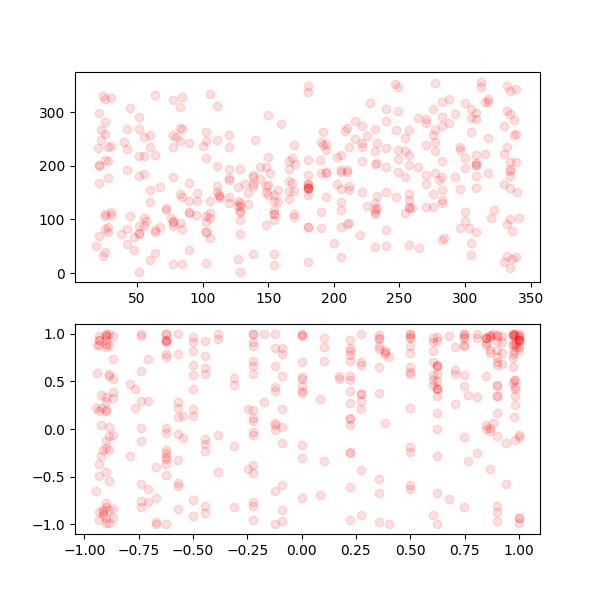

In [115]:
ts = np.linspace(0, (test_arctans.shape[0]*50)/1000,test_arctans.shape[0])
fig, ax = plt.subplots(2,1,figsize=(6,6), sharex=False)
ax[0].scatter(test_arctans, predicted_arctans_nl, color = 'r', alpha = 0.125)
# ax.scatter(test_arctans, test_arctans, color = 'k', alpha = 0.5)
ax[1].scatter(test_cos, pred_cos, color = 'r', alpha = 0.125)
# ax.scatter(test_cos, test_cos, color = 'k', alpha = 0.5)